In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
import tifffile

from sklearn.model_selection import train_test_split

import os

import scipy

In [2]:
tiles = pd.read_csv(r'.\Data\Tiles_expanded.csv')

In [48]:
tiles.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical
0,36,-122.514446,37.779636,-122.513306,37.778732,37.779184,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0
1,37,-122.514446,37.778732,-122.513306,37.777829,37.778280,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0
2,151,-122.513306,37.779636,-122.512166,37.778732,37.779184,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0
3,152,-122.513306,37.778732,-122.512166,37.777829,37.778280,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0
4,153,-122.513306,37.777829,-122.512166,37.776925,37.777377,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
cf = pd.unique(tiles['Collisions_Future'])

In [65]:
cf

array([ 0.,  5.,  1.,  2.,  4.,  3.,  6.,  9., 13.,  7., 11.,  8., 10.,
       16., 12., 15., 19., 17., 18.])

Balancing Dataset <br>
https://towardsdatascience.com/regression-for-imbalanced-data-with-application-edf93517247c <br>
https://datascience.stackexchange.com/questions/69085/smote-for-regression <br>
https://github.com/nickkunz/smogn

In [7]:
import smogn

In [56]:
rg_mtrx = []

for i in cf:
    if i == 0: 
        rg_mtrx.append([i, 0, 0])
    else: 
        rg_mtrx.append([i, 1, 0])

In [57]:
rg_mtrx

[[0.0, 0, 0],
 [5.0, 1, 0],
 [1.0, 1, 0],
 [2.0, 1, 0],
 [4.0, 1, 0],
 [3.0, 1, 0],
 [6.0, 1, 0],
 [9.0, 1, 0],
 [13.0, 1, 0],
 [7.0, 1, 0],
 [11.0, 1, 0],
 [8.0, 1, 0],
 [10.0, 1, 0],
 [16.0, 1, 0],
 [12.0, 1, 0],
 [15.0, 1, 0],
 [19.0, 1, 0],
 [17.0, 1, 0],
 [18.0, 1, 0]]

In [59]:
tiles_smogn = smogn.smoter(
    
    ## main arguments
    data = tiles[[]],           ## pandas dataframe
    y = 'Collisions_Future',          ## string ('header name')
    #k = 2,                    ## positive integer (k < n)
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    #replace = True,
    rel_method = 'manual',
    #rel_thres = 1,
    #rel_coef = 0.01,
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

r_index: 100%|######################################################################| 873/873 [00:02<00:00, 332.54it/s]


In [61]:
tiles_smogn.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical
0,271,-122.512166,37.774235,-122.511026,37.773331,37.773783,-122.511596,3.022727,0.0000,0.0,0.000000,1.500000,2.267045
1,11555,-122.400434,37.762452,-122.399294,37.761548,37.762000,-122.399864,0.754265,0.0000,0.0,0.000000,1.500000,0.000000
2,7866,-122.436918,37.769886,-122.435778,37.768982,37.769434,-122.436348,4.000000,0.0000,0.0,0.789807,1.500000,0.420386
3,5672,-122.458580,37.778260,-122.457440,37.777357,37.777809,-122.458010,2.550633,4.3481,0.0,0.000000,1.500000,2.000000
4,390,-122.511026,37.770984,-122.509885,37.770081,37.770533,-122.510456,0.000000,0.0000,0.0,0.425726,1.333333,2.722822


In [62]:
len(tiles_smogn)

8289

In [63]:
len(tiles)

10471

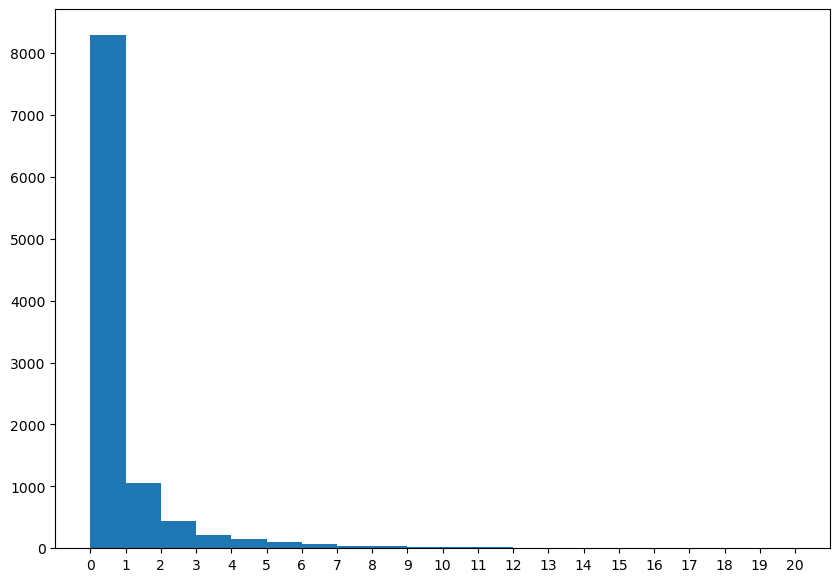

In [69]:
fig, ax = plt.subplots(figsize =(10, 7))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ax.hist(tiles['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
 
# Show plot
plt.show()

In [96]:
from sklearn.utils import resample

# # Separate majority and minority classes

# # why did Noriel use historical instead of future?
# df_majority = tiles.loc[tiles["Collision_binary_historical"] == 0]
# df_minority = tiles.loc[tiles["Collision_binary_historical"] == 1]
 
# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    
#                                  n_samples=int(major_count/ratio))
# df_majority_downsampled = pd.concat([df_majority_downsampled, df_minority])

# #Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     
#                                  n_samples=int(minor_count*ratio))
# df_minority_upsampled = pd.concat([df_minority_upsampled, df_majority])

set = tiles[tiles["Collisions_Future"] == 0]
sample = resample(set, replace=False, n_samples= 1000)
for c in np.arange(1,19,1):
    set = tiles[tiles["Collisions_Future"] == c]
    if c == 14:
        continue
    elif c == 13 or c == 15:
        df = resample(set, replace=True, n_samples= 1500)
    elif c == 15:
        df = resample(set, replace=True, n_samples= 1500)
    else: 
        df = resample(set, replace=True, n_samples= 1000)
    sample = pd.concat([sample, df])

In [97]:
sample.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical
8683,11283,-122.402715,37.800419,-122.401574,37.799515,37.799967,-122.402145,2.0,0.0,0.0,0.0,0.0,0.0
9525,12291,-122.393594,37.720901,-122.392454,37.719998,37.720450,-122.393024,0.0,0.0,0.0,0.0,0.0,0.0
6018,8379,-122.432358,37.722709,-122.431218,37.721805,37.722257,-122.431788,0.0,0.0,0.0,0.0,0.0,0.0
1735,3487,-122.480243,37.778732,-122.479102,37.777829,37.778280,-122.479672,4.0,0.0,0.0,0.0,0.0,1.0
3924,6086,-122.455160,37.716383,-122.454020,37.715480,37.715932,-122.454590,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
len(sample)

19000

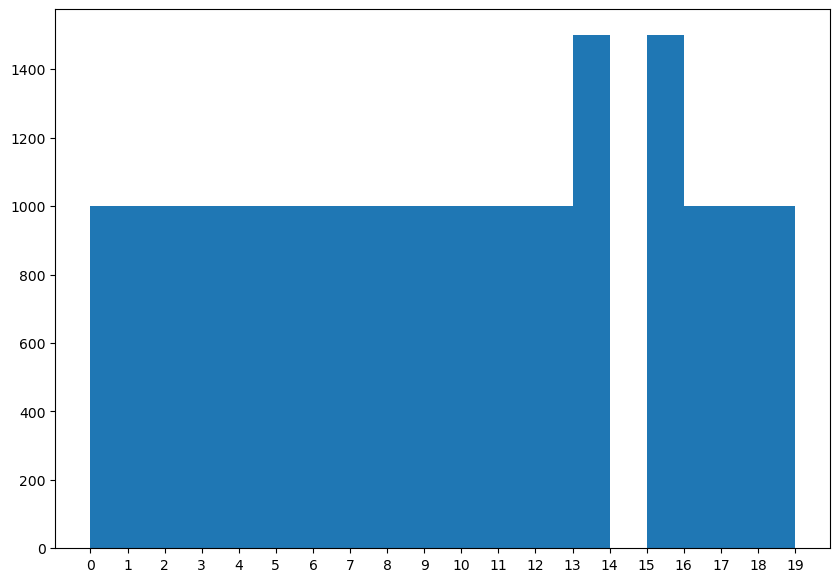

In [99]:
fig, ax = plt.subplots(figsize =(10, 7))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.hist(sample['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
 
# Show plot
plt.show()

In [102]:
sample.to_csv('.\Data\Tiles_expanded_balanced.csv', index = False) 

In [ ]:
def preprocess_data_part1(IMAGE_PATH):
    """ Generate lists of images and labelsbased on temp_no_refer and temp_refer lists
    
    Params:
    -------
    IMAGE_PATH (str): path to directory with images.
    
    Returns:
    --------
    images_mini  (np.ndarray): Images of shape (N, 149 3)
    """
    
    data_mini = []
    
    for id in tile['Tile_ID']:    
                    
        # read image and store as matrix            
        # Index at the end makes all images the same size (they sometimes differ by 1 pixel)
        image = tifffile.imread(IMAGE_PATH + str(id) + '.tif')[0:148, 0:188, :]
            
        # append to images
        data_mini.append(image)
        
        # append 
 
    # stack images and trasnform to array
    images_mini = np.stack(data_mini)
    
    return images_mini

In [ ]:
# THERE IS ONE FILE IN THE "SATELLITE IMAGES TILED" FOLDER THAT IS NOT A TIF IMAGE, DELETE THIS FILE
images_mini = preprocess_data_part1(IMAGE_PATH)

https://towardsdatascience.com/image-clustering-using-k-means-4a78478d2b83

In [3]:
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
#from tqdm import tqdm
#import os
#import shutil
import tifffile

In [4]:
# Function to Extract features from the images
def features():
    #model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for id in tiles['Tile_ID']:
        fname='./Satellite Imagery/Satellite Images Tiled/'
        img= tifffile.imread(fname + str(id) + '.tif')[0:148, 0:188, :]
        #x=np.expand_dims(img,axis=0)
        #x=preprocess_input(x)
        #feat=model.predict(x, verbose = 0)
        feat=img.flatten()
        t = np.asarray(tiles[tiles['Tile_ID'] == id][['Collisions_Historical', 'Collisions_Future', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop']]).flatten()
        feat = np.append(t, feat)
        features.append(feat)
        img_name.append(id)
    return features,img_name

In [5]:
img_features,img_name=features()

In [6]:
import copy

img_features2 = copy.deepcopy(img_features)

In [ ]:
#img_features.to_csv('.\Data\Features_concatenated.csv', index = False) 

In [7]:
# scale up the collisions future

for i in range(len(img_features2)):
    #print(img_features[i][0])
    img_features2[i][0] = img_features2[i][0]**10

In [12]:
5**10

9765625

In [14]:
len(img_features2)

10471

In [16]:
np.shape(img_features2[0])

(111303,)

https://medium.com/the-data-science-publication/how-to-find-groups-within-data-using-the-k-means-algorithm-3c1d6feeacf9

In [9]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(img_features2)
y_kmeans = kmeans.labels_

MemoryError: Unable to allocate 8.68 GiB for an array with shape (10471, 111303) and data type float64

In [ ]:
pd.unique(y_kmeans)

In [ ]:
figure, axis = plt.subplots(5, 4)
figure.tight_layout()
c = 0
for i in range(5):
    for j in range(4):
        axis[i,j].hist(tiles['Collisions_Future'][y_kmeans == c], bins=30)
        #axis[i,j].set_title('Clu)
        c += 1

In [ ]:
# Sample based on k-means clustering
from sklearn.utils import resample

In [ ]:
tiles['Cluster'] = y_kmeans
tiles.head(5)

In [ ]:
sample = pd.DataFrame()
for c in range(20):
    set = tiles[y_kmeans == c]
    df = resample(set, replace=True, n_samples= 250)
    sample = pd.concat([sample, df])

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.hist(sample['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
 
# Show plot
plt.show()

In [144]:
sample.to_csv('.\Data\Tiles_expanded_balanced.csv', index = False) 